## Importing the required libraries


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data ingestion and preprocessing


In [4]:
# Data ingestion

data = pd.read_csv("/content/dataset.csv")

In [5]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
100,LP001345,Male,Yes,2,Not Graduate,No,4288,3263.0,133.0,180.0,1.0,Urban,Y
373,LP002205,Male,No,1,Graduate,No,3062,1987.0,111.0,180.0,0.0,Urban,N
175,LP001606,Male,Yes,0,Graduate,No,3497,1964.0,116.0,360.0,1.0,Rural,Y
361,LP002170,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban,Y


In [6]:
data.shape

(614, 13)

In [7]:
data.drop(columns='Loan_ID',axis=1,inplace=True)

In [8]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
500,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
383,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y
465,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y
295,Male,Yes,3+,Graduate,NaN,4416,1250.0,110.0,360.0,1.0,Urban,Y
153,Male,Yes,2,Not Graduate,No,2281,0.0,113.0,360.0,1.0,Rural,N


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# Lable encoding for Loan_Status column

data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

<ipython-input-13-c9b14dd31f87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [14]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
201,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,1
560,Male,Yes,2,Not Graduate,No,3675,242.0,108.0,360.0,1.0,Semiurban,1
56,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,1
27,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,1
388,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,1


In [15]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
data = data.replace(to_replace='3+',value=4)

In [17]:
data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

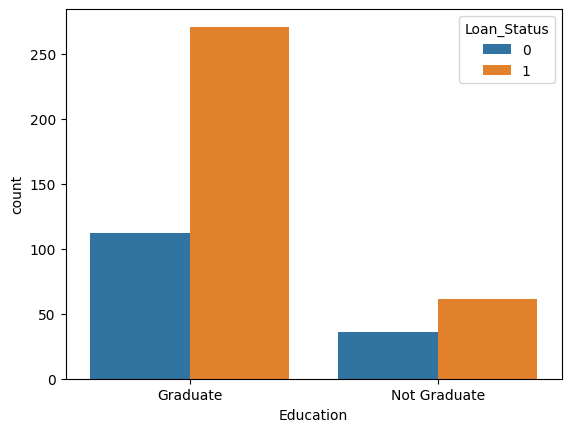

In [18]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

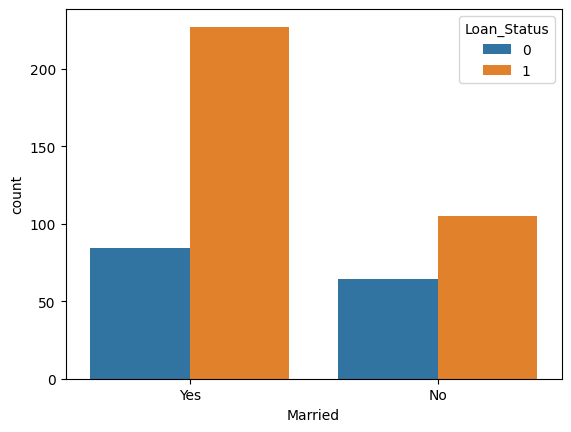

In [19]:
sns.countplot(data =data,x='Married',hue='Loan_Status')

In [20]:
data.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
74,Male,Yes,4,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,1
61,Male,Yes,4,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,1
257,Male,Yes,4,Graduate,No,5250,0.0,94.0,360.0,1.0,Urban,0


In [21]:
data.replace({'Gender':{'Female':0,'Male':1},'Married':{'No':0,'Yes':1},'Education':{'Not Graduate':0,'Graduate':1},'Self_Employed':{'No':0,'Yes':1},
              'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [22]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
146,0,1,2,1,0,14866,0.0,70.0,360.0,1.0,2,1
280,1,0,1,0,1,4053,2426.0,158.0,360.0,0.0,2,0
330,1,0,1,1,0,4384,1793.0,117.0,360.0,1.0,2,1
10,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1
368,1,1,1,1,0,6325,0.0,175.0,360.0,1.0,1,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 48.8+ KB


In [24]:
X = data.drop(columns='Loan_Status',axis=1)
Y = data['Loan_Status']

In [25]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [26]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [28]:
model = svm.SVC(kernel='linear')

In [29]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [30]:
training_data_pred =model.predict(X_train)
accuracy_on_training_data =accuracy_score(training_data_pred,Y_train)

In [31]:
print("Accuracy score on Training data : ",accuracy_on_training_data)

Accuracy score on Training data :  0.7986111111111112


In [32]:
test_data_pred =model.predict(X_test)
accuracy_on_test_data =accuracy_score(test_data_pred,Y_test)

In [33]:
print("Accuracy score on Test data : ",accuracy_on_test_data)

Accuracy score on Test data :  0.8333333333333334


In [34]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
78,1,1,4,1,0,3167,4000.0,180.0,300.0,0.0,1,0
397,1,1,0,1,0,3033,1459.0,95.0,360.0,1.0,2,1
172,1,1,4,0,0,3522,0.0,81.0,180.0,1.0,0,0
34,1,0,4,1,0,12500,3000.0,320.0,360.0,1.0,0,0
541,0,0,0,1,0,2138,0.0,99.0,360.0,0.0,1,0


## Predictive System

In [39]:
input = (1,1,0,1,0,3033,1459.0,95.0,360.0,1.0,2)

data = np.asarray(input)

input_data = data.reshape(1,-1)

prediction = model.predict(input_data)

if (prediction[0] == 0):
  print("Loan Status is Negative : ",prediction)
else:
  print("Loan Status is positive : ",prediction)

Loan Status is positive :  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
